In [19]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('fat_rate.csv')
df.head()

,구분별(1),구분별(2),구분별(3),2009,2009.1,2009.2,2010,2010.1,2010.2,2011,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,구분별(1),구분별(2),구분별(3),전체,남자,여자,전체,남자,여자,전체,...,여자,전체,남자,여자,전체,남자,여자,전체,남자,여자
1,서울시,소계,소계,21.3,27.7,15.2,21.7,28.5,15.1,22.7,...,23.0,28.9,38.6,19.7,28.6,38.5,19.4,29.5,39.7,20.0
2,서울시,생애주기별,19~29세,13.7,21.2,6.2,13.1,21.5,4.6,15.4,...,11.1,23.2,35.1,11.8,23.5,35.1,12.5,24.2,35.3,13.9
3,서울시,생애주기별,30~44세,22.7,34.1,10.9,22.9,34.5,10.9,23.6,...,15.5,31.2,46.7,15.3,31.1,46.7,15.5,33.7,49.8,17.2
4,서울시,생애주기별,45~64세,24.1,27.7,20.7,24.4,28.7,20.3,25.5,...,25.2,30.3,40.6,20.8,30.2,40.5,20.7,29.6,40.0,20.1


In [4]:
df.columns

Index(['구분별(1)', '구분별(2)', '구분별(3)', '2009', '2009.1', '2009.2', '2010',
       '2010.1', '2010.2', '2011', '2011.1', '2011.2', '2012', '2012.1',
       '2012.2', '2013', '2013.1', '2013.2', '2014', '2014.1', '2014.2',
       '2015', '2015.1', '2015.2', '2016', '2016.1', '2016.2', '2017',
       '2017.1', '2017.2', '2018', '2018.1', '2018.2', '2019', '2019.1',
       '2019.2', '2020', '2020.1', '2020.2', '2021', '2021.1', '2021.2',
       '2022', '2022.1', '2022.2'],
      dtype='object')

In [5]:
df_target = df[(df['구분별(3)']=='19~29세') | (df['구분별(3)']=='30~44세')]

In [139]:
target_col = ['2017','2018','2019','2020','2021','2022']

In [140]:
df_target = df_target[target_col]
np.array(df_target)

array([['18.9', '21.0', '22.9', '23.2', '23.5', '24.2'],
       ['26.1', '29.4', '32.5', '31.2', '31.1', '33.7']], dtype=object)

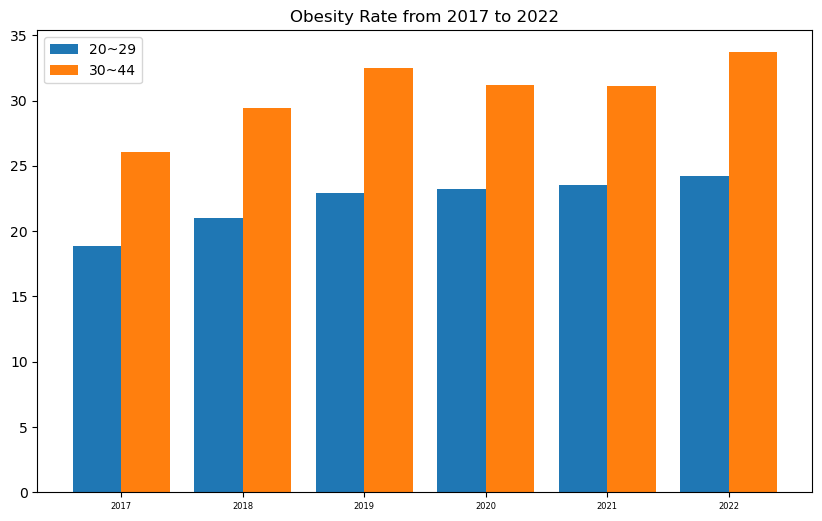

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = df_target.iloc[0, :].values.astype('float')       # 첫 번째 데이터 세트
y2 = df_target.iloc[1, :].values.astype('float')        # 두 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label='20~29') 
plt.bar(x + width/2, y2, width=width, label='30~44') 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title('Obesity Rate from 2017 to 2022')
plt.legend()
plt.show()

In [95]:
df_dessert=pd.read_excel('dessert_trend.xlsx')

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [96]:
df_dessert = pd.DataFrame(df_dessert.iloc[6:])
colnames = ['date','rate']

In [97]:
df_dessert = df_dessert.rename(columns = {df_dessert.columns[0]: colnames[0], df_dessert.columns[1]:colnames[1]})

In [98]:
df_dessert

,date,rate
6,2017-01-01,23.48856
7,2017-01-02,22.79411
8,2017-01-03,22.91666
9,2017-01-04,43.1781
10,2017-01-05,28.14542
...,...,...
2183,2022-12-18,46.93627
2184,2022-12-19,42.19771
2185,2022-12-20,44.28104
2186,2022-12-21,46.16013


In [112]:
df_dessert['date'] = pd.to_datetime(df_dessert['date'])
df_dessert['year'] = df_dessert['date'].dt.year
df_dessert['rate'] = df_dessert['rate'].astype('float')

In [133]:
a = df_dessert.groupby('year')['rate'].sum()
a

year
2017     8231.86095
2018     9318.42133
2019     9771.60768
2020    11981.41158
2021    13547.01628
2022    15374.95732
Name: rate, dtype: float64

In [156]:
a= a.reset_index()
a

,index,year,rate
0,0,2017,8231.86095
1,1,2018,9318.42133
2,2,2019,9771.60768
3,3,2020,11981.41158
4,4,2021,13547.01628
5,5,2022,15374.95732


In [135]:
a['rate'][1]

9318.42133

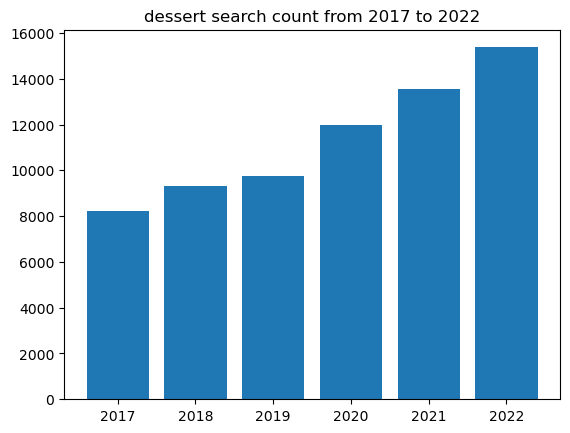

In [138]:
plt.bar(a['year'],a['rate'])
plt.title('dessert search count from 2017 to 2022')
plt.show()

In [102]:
x = np.arange(len(df_dessert['year'].unique))  # 막대의 x좌표
y1 = df_dessert.iloc[0, :].values       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label='20')  # 첫 번째 데이터 세트 
plt.ylim(0,35)
plt.yticks(np.arange(0, 35, 10))
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title('Obesity Rate from 2to 2022')
plt.legend()
plt.show()

TypeError: object of type 'method' has no len()